In [213]:
import polars as pl
import os 
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import logging

In [214]:
# Load data
data = pl.read_csv(os.getcwd() + '/raw/bear_attacks.csv')

In [215]:
data[:5]

Date,Location,Details,Bear,Latitude,Longitude,Name,Age,Gender
str,str,str,str,f64,f64,str,str,str
"""August 23, 2018""","""Lyon Inlet, Nunavut ""","""Three men from Naujaat, whose …","""Polar""",66.53416,-83.88217,"""Darryl Kaunak""",""" 33""",""" male"""
"""July 3, 2018""","""Sentry Island, Nunavut""","""A polar bear approached a man …","""Polar""",61.16723,-93.85015,"""Aaron Gibbons""",""" 31""",""" male"""
"""July 9, 1999""","""near Rankin Inlet, Nunavut""","""Amitnak was mauled after tryin…","""Polar""",62.808913,-92.087741,"""Hattie Amitnak""",""" 64""",""" female"""
"""December 8, 1990""","""Point Lay, Alaska""","""While Stalker was walking with…","""Polar""",69.7428,-163.01125,"""Carl Stalker""",""" 28""",""" male"""
"""November 29, 1983""","""Churchill, Manitoba""","""Mutanen was attacked and dragg…","""Polar""",58.767755,-94.163998,"""Thomas Mutanen""",""" 46""",""" male"""


In [216]:
data = data.with_columns(
            pl.when(
                (pl.col('Age')=='10 months') | (pl.col('Age')=='5 months')
            )
            .then(pl.lit(0))
            .otherwise(pl.col('Age'))
            .alias('age_int')
        )

In [217]:
data

Date,Location,Details,Bear,Latitude,Longitude,Name,Age,Gender,age_int
str,str,str,str,f64,f64,str,str,str,str
"""August 23, 2018""","""Lyon Inlet, Nunavut ""","""Three men from Naujaat, whose …","""Polar""",66.53416,-83.88217,"""Darryl Kaunak""",""" 33""",""" male""",""" 33"""
"""July 3, 2018""","""Sentry Island, Nunavut""","""A polar bear approached a man …","""Polar""",61.16723,-93.85015,"""Aaron Gibbons""",""" 31""",""" male""",""" 31"""
"""July 9, 1999""","""near Rankin Inlet, Nunavut""","""Amitnak was mauled after tryin…","""Polar""",62.808913,-92.087741,"""Hattie Amitnak""",""" 64""",""" female""",""" 64"""
"""December 8, 1990""","""Point Lay, Alaska""","""While Stalker was walking with…","""Polar""",69.7428,-163.01125,"""Carl Stalker""",""" 28""",""" male""",""" 28"""
"""November 29, 1983""","""Churchill, Manitoba""","""Mutanen was attacked and dragg…","""Polar""",58.767755,-94.163998,"""Thomas Mutanen""",""" 46""",""" male""",""" 46"""
…,…,…,…,…,…,…,…,…,…
"""1855""","""Sierra Nevada, California""","""A professional trapper and tra…","""Brown""",36.57855,-118.29342,"""John ""Grizzly"" Adams""",""" 43""",""" male""",""" 43"""
"""December 19, 1853""","""Santa Monica, California""","""An experienced bear hunter who…","""Brown""",34.01158,-118.49227,"""Andrew Whitley ""Andy"" Sublette""",""" 46""",""" male""",""" 46"""
"""October 27, 1854""","""Mount San Antonio, California""","""A trapper and hunter who hunte…","""Brown""",34.28889,-117.64672,"""Isaac Slover""",""" 68""",""" male""",""" 68"""


In [218]:
data = data.with_columns(
        pl.col('age_int').str.extract(r"(\d+)").cast(pl.Int64).alias('age_int')
    )

In [219]:
data = data.with_columns(pl.col('age_int').fill_null(pl.col('age_int').median()))

In [220]:
data.null_count()

Date,Location,Details,Bear,Latitude,Longitude,Name,Age,Gender,age_int
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,1,1,1,0


In [221]:
data.filter(pl.any_horizontal(pl.all().is_null()))

Date,Location,Details,Bear,Latitude,Longitude,Name,Age,Gender,age_int
str,str,str,str,f64,f64,str,str,str,f64
"""Unknown date prior to February…","""Helena, Montana""","""On February 14, 1914 in the mo…","""Brown""",46.58976,-112.02065,null,null,null,37.0


In [223]:
data=data.with_columns(pl.col('Gender').fill_null('female'))

In [224]:
data.group_by('Bear').len()

Bear,len
str,u32
"""Brown""",85
"""Black""",64
"""Polar""",7


In [225]:
data.select(pl.col('Bear').value_counts(normalize=True))

Bear
struct[2]
"{""Polar"",0.044872}"
"{""Brown"",0.544872}"
"{""Black"",0.410256}"


In [226]:
data = data.with_columns(pl.col('Location').str.
                       slice(pl.col('Location').str.find(',')+1).alias('State'))

data = data.with_columns(pl.col('State').str.strip_chars())

In [227]:
data = data.with_columns(pl.col('Location').str.slice(0,pl.col('Location').str.find(',') ).alias('exact_location'))

In [228]:
data=data.with_columns(pl.col('State').fill_null('Wyoming'))

In [229]:
data=data.with_columns(pl.col('Gender').fill_null('female'))

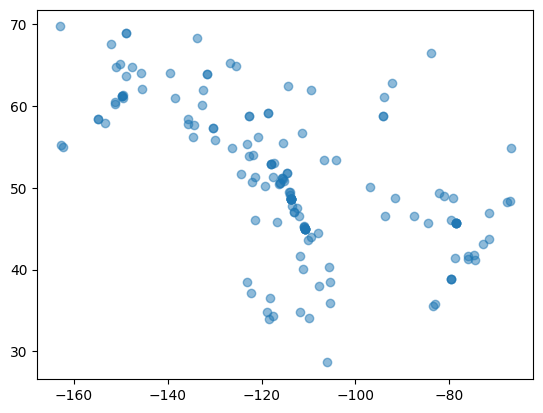

In [230]:
import matplotlib.pyplot as plt
plt.scatter(x=data['Longitude'], y=data['Latitude'], alpha=.5)
plt.show()

In [231]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [232]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   

/var/folders/ql/k8rkvhrs2_1c06lvyyfmy4th0000gp/T/ipykernel_12384/1944121776.py:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(map, marker='o', color='red', markersize=15);


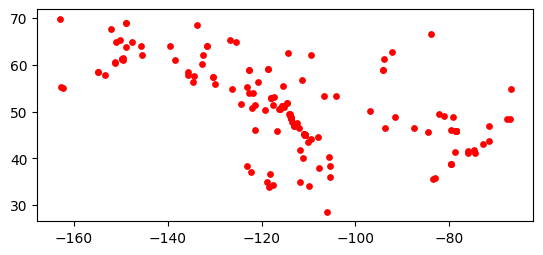

In [233]:
map = data[['Longitude','Latitude']]
gdf.plot(map, marker='o', color='red', markersize=15);


In [234]:
data.group_by('Location').len().sort(by = 'len',descending=True)[:10]

Location,len
str,u32
"""Glacier National Park, Montana""",10
"""Yellowstone National Park, Wyo…",7
"""Algonquin Provincial Park, Ont…",6
"""Jasper National Park, Alberta""",3
"""Job, West Virginia""",3
"""near Anchorage, Alaska""",3
"""near Fort Nelson, British Colu…",2
"""Arctic National Wildlife Refug…",2
"""Churchill, Manitoba""",2


In [235]:
# Get last 4 chars of each date to extract year
data = data.with_columns(pl.col('Date').str.slice(-4).alias('Year'))

In [236]:
non_digit_yr = []
for year in data['Year']: 
    if not year.isdigit(): 
        non_digit_yr.append(year)

non_digit_yr

['nown']

In [237]:
# Remove nown row
data = data.filter(pl.col('Year')!='nown')

In [238]:
# Time range
print(f"Time Range : {data['Year'].min()} - {data['Year'].max()}")

Time Range : 1784 - 2019


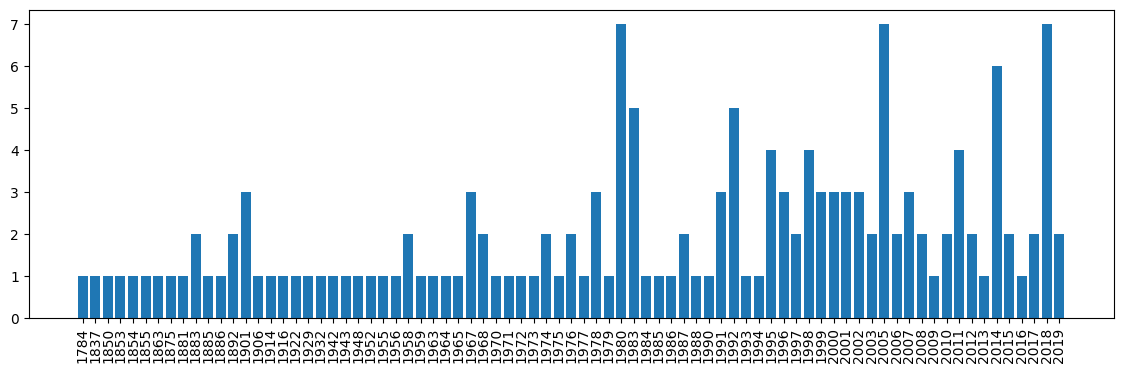

In [239]:
import seaborn as sns
ax = data.group_by('Year').len().sort(by = 'Year')
plt.figure(figsize=(14,4))
plt.bar(ax['Year'],ax['len'] )
plt.xticks(rotation = 90)
plt.show()

In [240]:
# Average attacks per year (in the last 10 years)
data = data.with_columns(pl.col('Year').cast(pl.Int32))
last_year = data['Year'].max()
last_10_years = data.filter(pl.col('Year') >= (last_year - 10))

<Axes: >

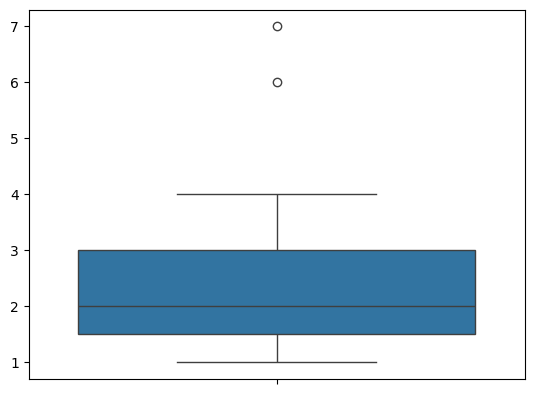

In [241]:
last_10_years_attacks = last_10_years.group_by('Year').len()
sns.boxplot(last_10_years_attacks['len'])


In [242]:
print(f"AVG Attacks per Year ~{round(last_10_years_attacks['len'].mean(),0)}")
print("However, there is 50% chance that attacks in a year do not exceed 2")
year_outlier = last_10_years_attacks.filter(pl.col('len') == last_10_years_attacks['len'].max())['Year'].unique()[0]
print(f"There was a maximum of {last_10_years_attacks['len'].max()} attacks, registered in {year_outlier} ")

AVG Attacks per Year ~3.0
However, there is 50% chance that attacks in a year do not exceed 2
There was a maximum of 7 attacks, registered in 2018 


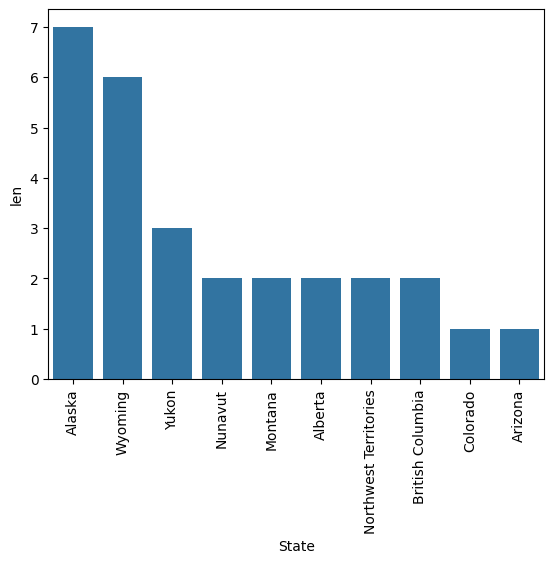

In [243]:
ax = last_10_years.group_by('State').len().sort(by = 'len', descending=True)[:10]
sns.barplot(data = ax, x = 'State', y = 'len')
plt.xticks(rotation = 90)
plt.show()

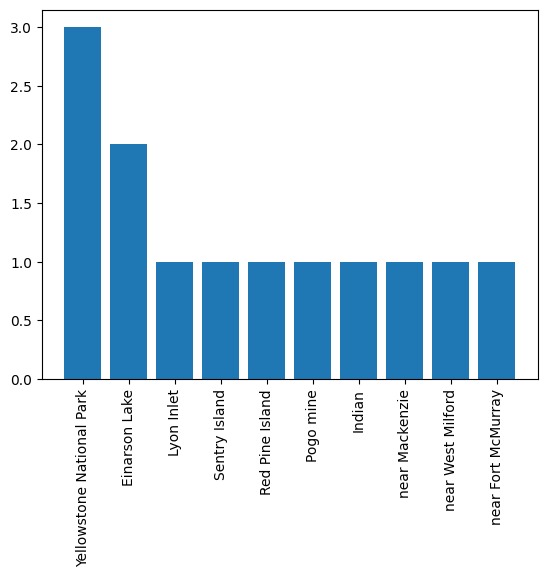

In [245]:
# Exact location 
ax = last_10_years['exact_location'].value_counts(sort=True)[:10]
plt.bar(ax['exact_location'], ax['count'])
plt.xticks(rotation = 90)
plt.show()

In [246]:
non_digit_age = []
last_10_years = last_10_years.with_columns(pl.col('Age').str.strip_chars())
for age in last_10_years['Age']:
    if not age.isdigit():
        non_digit_age.append(0)
    else: 
        non_digit_age.append(age)

last_10_years = last_10_years.with_columns(pl.Series('age_int', non_digit_age,strict=False).cast(pl.Int32))

In [247]:
last_10_years['age_int'].describe()

statistic,value
str,f64
"""count""",30.0
"""null_count""",0.0
"""mean""",44.1
"""std""",18.164668
"""min""",0.0
"""25%""",31.0
"""50%""",44.0
"""75%""",59.0
"""max""",74.0


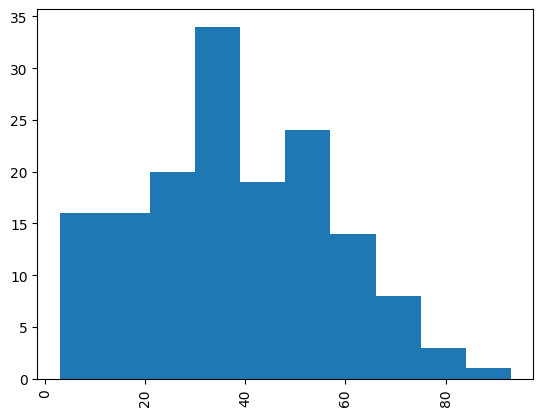

In [248]:
ax = data['age_int'].value_counts(sort = True)
plt.hist(data['age_int'])
plt.xticks(rotation = 90)
plt.show()

<BarContainer object of 2 artists>

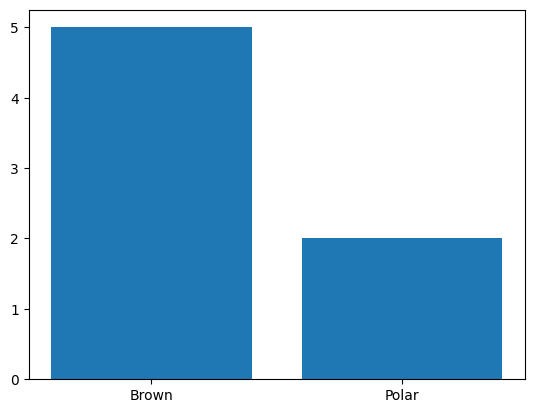

In [249]:
# 2018 attacks - bears
data_2018 = data.filter(pl.col('Year') == 2018)
ax = data_2018.group_by('Bear').len()
plt.bar(ax['Bear'], ax['len'])